### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from IPython.core.display import display,HTML
from mlxtend.plotting import plot_confusion_matrix
import pickle

import os
for dirname,_,filenames in os.walk("splitted_data"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


### Data Loading

In [2]:
X_train=pd.read_csv("splitted_data/X_train.csv")
X_test=pd.read_csv("splitted_data/X_test.csv")
y_train=pd.read_csv("splitted_data/y_train.csv")
y_test=pd.read_csv("splitted_data/y_test.csv")

In [3]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(958, 3) (240, 3) (958, 1) (240, 1)


In [4]:
X_train.head(10)

,CO,NH3,C6H6
0,400,109,118
1,904,505,165
2,1672,427,82
3,1705,506,116
4,1027,221,142
5,528,184,125
6,878,379,114
7,1699,226,91
8,1735,378,96
9,99,24,61


In [5]:
X_test.head(10)

,CO,NH3,C6H6
0,621,462,89
1,133,57,64
2,1463,243,111
3,202,24,53
4,602,491,154
5,138,27,58
6,1426,246,140
7,1107,539,97
8,825,316,132
9,249,32,61


In [6]:
y_train.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [7]:
y_test.head()

,Status
0,1
1,0
2,1
3,0
4,1


### Algorithm 1 : RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [9]:
RF_predictions=RF_model.predict(X_test).tolist()
print(RF_predictions)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [10]:
true_labels=y_test["Status"].tolist()
print(true_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


### Result Analysis

***Accuracy Score***

In [11]:
RF_accuracy=accuracy_score(y_true=true_labels,y_pred=RF_predictions)
print(f"Validation accuracy of RandomForestClassifier model is {RF_accuracy*100.0:.2f}%")

Validation accuracy of RandomForestClassifier model is 100.00%


***Classification Report***

In [12]:
display(HTML("<h1>RandomForestClassifier classificaton report"))
print(classification_report(y_true=true_labels,y_pred=RF_predictions,target_names=["Fresh","Spoiled"]))

              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       113
     Spoiled       1.00      1.00      1.00       127

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



***Confusion Matrxi***

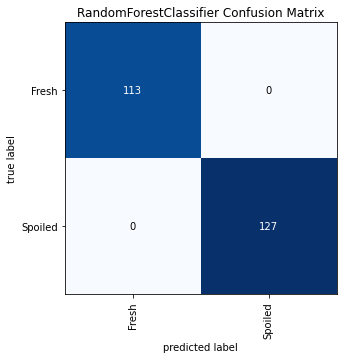

In [13]:
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=RF_predictions),
                         figsize=(5,5),
                         class_names=["Fresh","Spoiled"],
                         cmap=plt.cm.Blues)
plt.title(label="RandomForestClassifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

In [14]:
with open(file="model/RandomForestClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

---

### Algorithm 2 : SupportVectorClassifier

In [15]:
from sklearn.svm import SVC
SVC_model=SVC(max_iter=1)
SVC_model.fit(X_train,y_train)

SVC(max_iter=1)

In [16]:
SVC_predictions=SVC_model.predict(X_test).tolist()
print(SVC_predictions)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


In [17]:
true_labels=y_test["Status"].tolist()
print(true_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


### Result Analysis

***Accuracy Score***

In [18]:
SVC_accuracy=accuracy_score(y_true=true_labels,y_pred=SVC_predictions)
print(f"Validation accuracy of SupportVectorClassifier model is {SVC_accuracy*100.0:.2f}%")

Validation accuracy of SupportVectorClassifier model is 88.33%


***Classification Report***

In [19]:
display(HTML("<h1>SupportVectorClassifier classificaton report"))
print(classification_report(y_true=true_labels,y_pred=SVC_predictions,target_names=["Fresh","Spoiled"]))

              precision    recall  f1-score   support

       Fresh       0.85      0.92      0.88       113
     Spoiled       0.92      0.85      0.89       127

    accuracy                           0.88       240
   macro avg       0.88      0.89      0.88       240
weighted avg       0.89      0.88      0.88       240



***Confusion Matrxi***

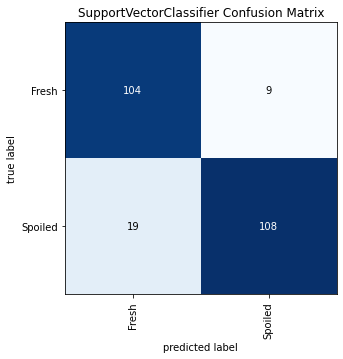

In [20]:
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=SVC_predictions),
                         figsize=(5,5),
                         class_names=["Fresh","Spoiled"],
                         cmap=plt.cm.Blues)
plt.title(label="SupportVectorClassifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

In [21]:
with open(file="model/SupportVectorClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=SVC_model,file=file)

---

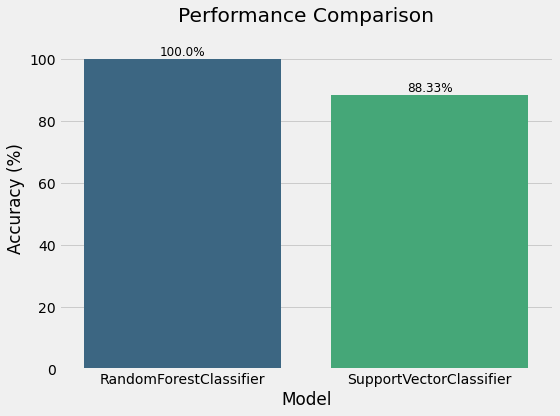

In [25]:
import seaborn as sns

model_names = ['RandomForestClassifier', 'SupportVectorClassifier']
accuracy_scores = [RF_accuracy*100, round(SVC_accuracy*100, 2)]

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
    plt.ylim(0, 110)
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    plt.title('Performance Comparison')
    for i, score in enumerate(accuracy_scores):
        plt.text(i, score, f'{score}%', ha='center', va='bottom', fontsize=12, color='black')
    plt.tight_layout()
    plt.show()